In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

## Data Imports

In [37]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/economics writeup/data/Final Project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Inflation

In [38]:
inflation = pd.read_csv('inflation_historical.csv')
inflation.rename(columns={'caldt':'date'},inplace=True)
inflation.set_index('date',inplace=True)
inflation.index = pd.to_datetime(inflation.index)
inflation = inflation.iloc[1:,4:]


,cpiret,price,y-over-y
date,,,
1926-01-30,0.000000,100.000000,NaN
1926-02-27,0.000000,100.000000,NaN
1926-03-31,-0.005587,99.441300,NaN
1926-04-30,0.005618,99.999961,NaN
1926-05-28,-0.005587,99.441261,NaN
...,...,...,...
2022-08-31,-0.000354,1654.592598,0.082628
2022-09-30,0.002151,1658.151627,0.082018
2022-10-31,0.004056,1664.877090,0.077456


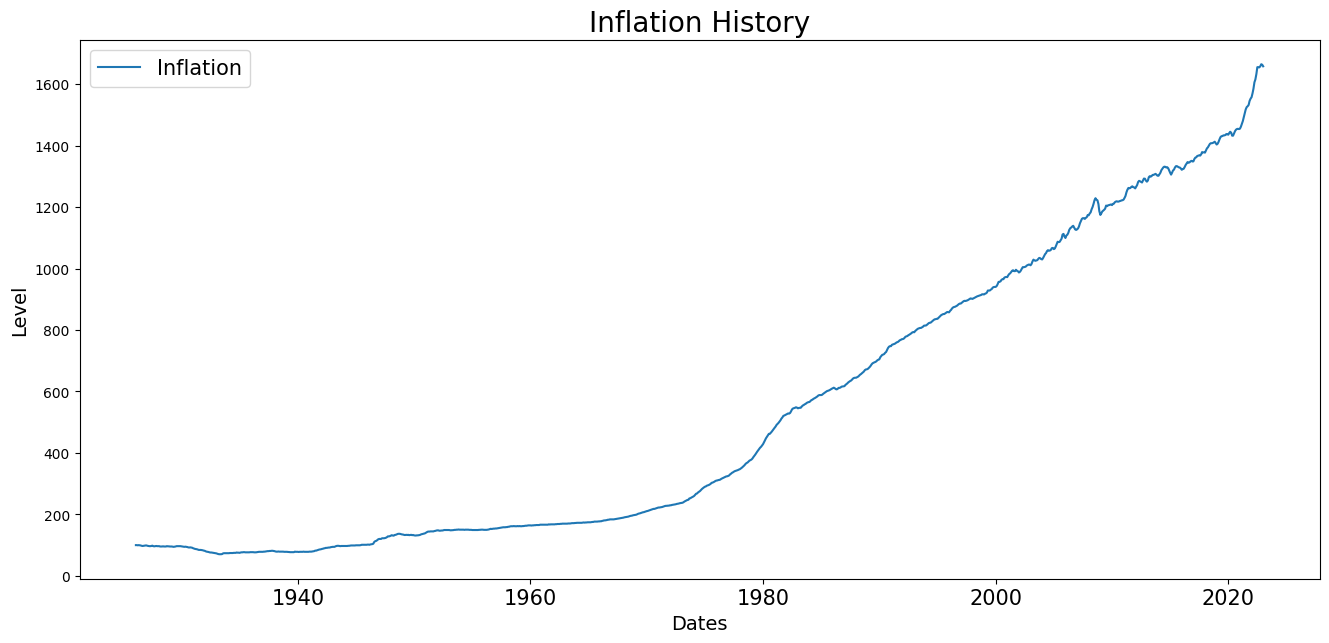

In [39]:
plt.figure(figsize=(16,7))
plt.plot(inflation['price'],label='Inflation')
plt.xlabel('Dates',fontsize=14)
plt.ylabel('Level',fontsize=14)
plt.title('Inflation History',fontsize=20)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)

### Government Spending

In [40]:
govt = pd.read_excel('govt_spending_yearly.xlsx',skiprows=3)
govt.rename(columns={'Unnamed: 0':"dates"},inplace=True)
govt.set_index('dates',inplace=True)
govt = govt.iloc[2:125,:]
year_part = govt.index.str.extract(r'(\d{4})')
govt.index = pd.to_datetime(year_part[0] + '-12-31', format = "%Y-%m-%d")


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Receipts,Outlays,Surplus or Deficit (-),Receipts.1,Outlays.1,Surplus or Deficit (-).1,Receipts.2,Outlays.2,Surplus or Deficit (-).2
0,,,,,,,,,
1901-12-31,588.0,525.0,63,588.0,525.0,63,..........,..........,..........
1902-12-31,562.0,485.0,77,562.0,485.0,77,..........,..........,..........
1903-12-31,562.0,517.0,45,562.0,517.0,45,..........,..........,..........
1904-12-31,541.0,584.0,-43,541.0,584.0,-43,..........,..........,..........
1905-12-31,544.0,567.0,-23,544.0,567.0,-23,..........,..........,..........
...,...,...,...,...,...,...,...,...,...
2018-12-31,3329907.0,4109047.0,-779140,2475160.0,3260475.0,-785315,854747,848572,6175
2019-12-31,3463364.0,4446960.0,-983596,2549061.0,3540343.0,-991282,914303,906617,7686
2020-12-31,3421164.0,6553621.0,-3132457,2455736.0,5598039.0,-3142303,965428,955582,9846


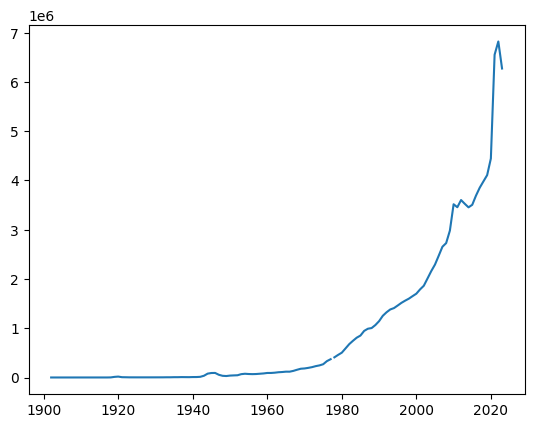

In [41]:
plt.plot(govt['Outlays'])

### Unemployment

In [42]:
urate = pd.read_csv('UNRATE.csv')
urate.rename(columns={'DATE':'date','UNRATE':'urate'},inplace=True)
urate.set_index('date',inplace=True)
urate.head(2)

,urate
date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2023-06-01,3.6
2023-07-01,3.5
2023-08-01,3.8


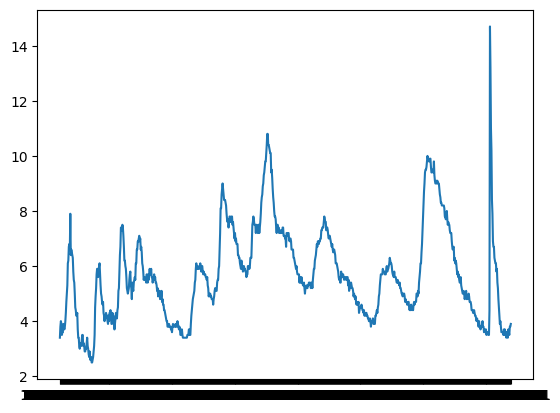

### Wages

In [44]:
wages = pd.read_csv('wages_data.csv')
wages.rename(columns={"DATE":'date','LES1252881600Q':'wages'},inplace=True)
wages.set_index('date',inplace=True)
wages.head(2)

,wages
date,
1979-01-01,335
1979-04-01,335
1979-07-01,330
1979-10-01,326
1980-01-01,321
...,...
2022-07-01,362
2022-10-01,363
2023-01-01,363


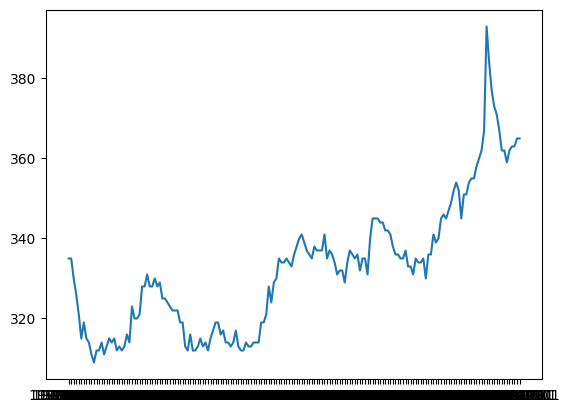

### FED Funds Rate

In [46]:
fed_rate = pd.read_csv('FEDFUNDS.csv')
fed_rate.rename(columns={'DATE':'date','FEDFUNDS':'fedfunds'},inplace=True)
fed_rate.set_index('date',inplace=True)
fed_rate.head(2)

,fedfunds
date,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2023-06-01,5.08
2023-07-01,5.12
2023-08-01,5.33


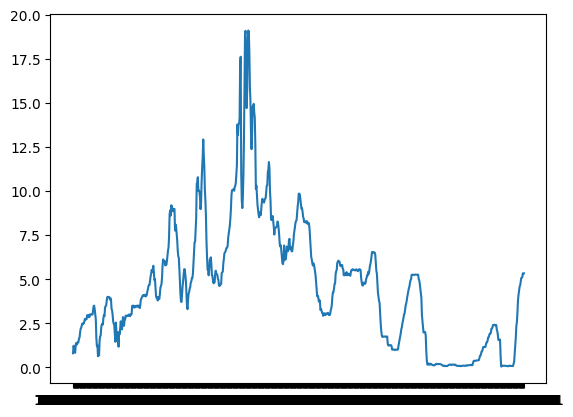

### Fed Policy

In [48]:
qe_qt = pd.read_csv('qe_qt.csv')
qe_qt.set_index('DateTime',inplace=True)


,Other Assets,MBS,Treasury Securities,Total Balance,Other Assets Growth,MBS Growth,Treasury Securities Growth,Total Balance Growth
DateTime,,,,,,,,
1/1/2003 0:00,0.095312,0.000000,0.629406,0.724718,0.000000,0.000000,0.000000,0.000000
2/1/2003 0:00,0.089424,0.000000,0.631902,0.721326,-0.061777,0.000000,0.003965,-0.004681
3/1/2003 0:00,0.084493,0.000000,0.639158,0.723651,-0.055144,0.000000,0.011484,0.003224
4/1/2003 0:00,0.091428,0.000000,0.645499,0.736926,0.082075,0.000000,0.009920,0.018345
5/1/2003 0:00,0.089085,0.000000,0.649273,0.738358,-0.025622,0.000000,0.005847,0.001943
...,...,...,...,...,...,...,...,...
2/1/2022 0:00,0.476459,2.686044,5.735093,8.897595,-0.021914,0.015690,0.008121,0.008731
3/1/2022 0:00,0.464506,2.713332,5.755987,8.933825,-0.025088,0.010159,0.003643,0.004072
4/1/2022 0:00,0.461684,2.725310,5.762538,8.949532,-0.006074,0.004414,0.001138,0.001758


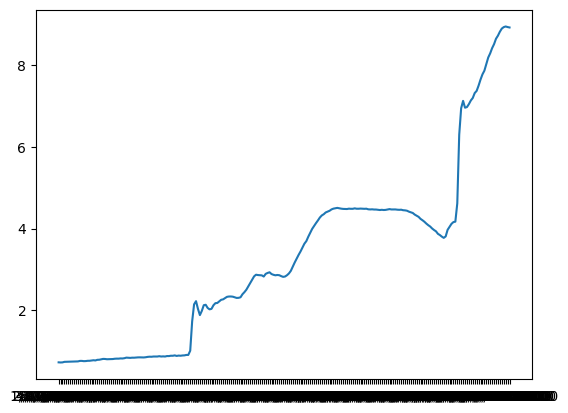

### Corporate Profits

In [50]:
profits = pd.read_excel('corporate_profits.xlsx',skiprows=7)
profits.set_index('date',inplace=True)
profits = profits.iloc[3:,:]


,Period,Manufacturing,Information,Mining,Retail,Services,Wholesale,Total
date,,,,,,,,
2000-10-01,4th Quarter-2000,62086.0,NaN,7642.0,14619.0,NaN,6178.0,90525
2001-01-01,1st Quarter-2001,11985.0,NaN,8725.0,9673.0,NaN,3967.0,34350
2001-04-01,2nd Quarter-2001,39643.0,NaN,7745.0,8891.0,NaN,5559.0,61838
2001-07-01,3rd Quarter-2001,20095.0,NaN,1387.0,8873.0,NaN,4166.0,34521
2001-10-01,4th Quarter-2001,11485.0,NaN,-816.0,14675.0,NaN,4657.0,30001
...,...,...,...,...,...,...,...,...
2022-04-01,2nd Quarter-2022,319708.0,72973.0,53579.0,51493.0,-9304.0,48687.0,537136
2022-07-01,3rd Quarter-2022,285338.0,59273.0,50823.0,26052.0,-12741.0,40174.0,448919
2022-10-01,4th Quarter-2022,252759.0,37175.0,43925.0,42501.0,-23745.0,34219.0,386834


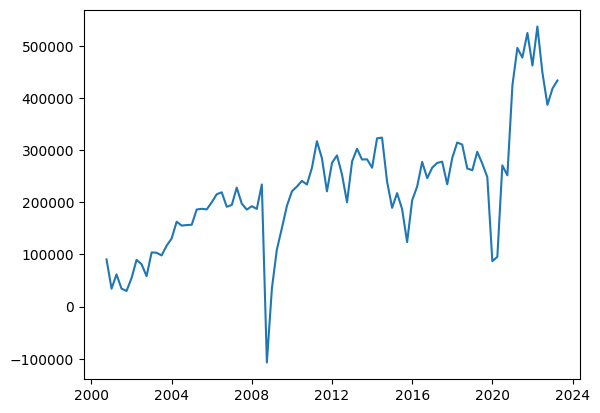

### Securities

In [52]:
start_date = "2005-01-01"
end_date = "2023-11-20"

In [53]:
TIPs = yf.download('TIP', start=start_date, end=end_date)
dbc= yf.download('DBC', start=start_date, end=end_date)
vnq= yf.download('vnq', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [54]:
trs = inflation[inflation.index >='1942-01-01']
trs = trs.iloc[:,0:4]

,cpiret,price,y-over-y
date,,,
1942-01-31,0.012903,87.709572,0.113474
1942-02-28,0.006369,88.268194,0.120566
1942-03-31,0.012658,89.385493,0.126759
1942-04-30,0.006250,89.944152,0.125873
1942-05-29,0.012422,91.061438,0.131943
...,...,...,...
2022-08-31,-0.000354,1654.592598,0.082628
2022-09-30,0.002151,1658.151627,0.082018
2022-10-31,0.004056,1664.877090,0.077456


## Calculations

### Inflation Correlations

#### Resampling to monthly

In [55]:
earliest = '2003-01-01'
latest = '2022-07-01'

In [56]:
inflation_q = inflation.resample('Q').last()


,cpiret,price,y-over-y
date,,,
1926-01-30,0.000000,100.000000,NaN
1926-02-27,0.000000,100.000000,NaN
1926-03-31,-0.005587,99.441300,NaN
1926-04-30,0.005618,99.999961,NaN
1926-05-28,-0.005587,99.441261,NaN
...,...,...,...
2022-08-31,-0.000354,1654.592598,0.082628
2022-09-30,0.002151,1658.151627,0.082018
2022-10-31,0.004056,1664.877090,0.077456


In [57]:
govt_spending = pd.DataFrame(govt['Outlays'])
resamp = govt_spending.resample('M').last()/12
govt_spending_m = pd.DataFrame(resamp['Outlays'].fillna(method='bfill')).dropna()
govt_spending_m['growth'] = govt_spending_m['Outlays'].pct_change()


,Outlays,growth
0,,
1901-12-31,43.750000,NaN
1902-01-31,40.416667,-0.07619
1902-02-28,40.416667,0.00000
1902-03-31,40.416667,0.00000
1902-04-30,40.416667,0.00000
...,...,...
2022-08-31,522777.000000,0.00000
2022-09-30,522777.000000,0.00000
2022-10-31,522777.000000,0.00000


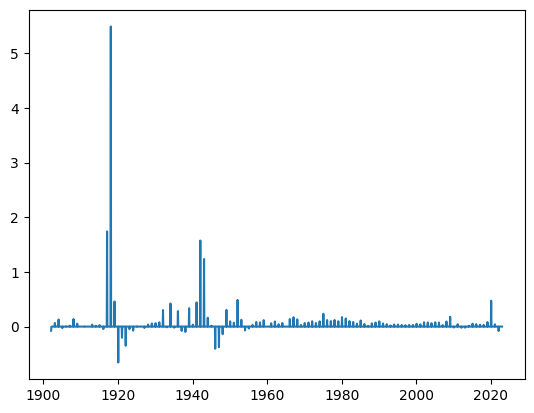

In [59]:
gov = govt_spending_m[govt_spending_m.index >= earliest]
gov = gov[gov.index < latest]
gov_g = list(gov['growth'])
gov_t = list(gov['Outlays'])

,Period,Manufacturing,Information,Mining,Retail,Services,Wholesale,Total
date,,,,,,,,
2000-10-01,4th Quarter-2000,62086.0,NaN,7642.0,14619.0,NaN,6178.0,90525
2001-01-01,1st Quarter-2001,11985.0,NaN,8725.0,9673.0,NaN,3967.0,34350
2001-04-01,2nd Quarter-2001,39643.0,NaN,7745.0,8891.0,NaN,5559.0,61838
2001-07-01,3rd Quarter-2001,20095.0,NaN,1387.0,8873.0,NaN,4166.0,34521
2001-10-01,4th Quarter-2001,11485.0,NaN,-816.0,14675.0,NaN,4657.0,30001
...,...,...,...,...,...,...,...,...
2022-04-01,2nd Quarter-2022,319708.0,72973.0,53579.0,51493.0,-9304.0,48687.0,537136
2022-07-01,3rd Quarter-2022,285338.0,59273.0,50823.0,26052.0,-12741.0,40174.0,448919
2022-10-01,4th Quarter-2022,252759.0,37175.0,43925.0,42501.0,-23745.0,34219.0,386834


In [61]:
urate['growth'] = urate['urate'].pct_change()
unem = urate[urate.index >= earliest]
unem = unem[unem.index < latest]
unem_g = list(unem['growth'])
unem_t = list(unem['urate'])

In [62]:
wages.index = pd.to_datetime(wages.index)
wages_m = wages.resample('M').last().fillna(method='bfill')
wages_m['growth'] = wages_m['wages'].pct_change()


,wages,growth
date,,
1979-01-31,335.0,NaN
1979-02-28,335.0,0.000000
1979-03-31,335.0,0.000000
1979-04-30,335.0,0.000000
1979-05-31,330.0,-0.014925
...,...,...
2023-03-31,365.0,0.000000
2023-04-30,365.0,0.000000
2023-05-31,365.0,0.000000


In [63]:
wag = wages_m[wages_m.index >= earliest]
wag = wag[wag.index < latest]
wag_g = list(wag['growth'])
wag_t = list(wag['wages'])

In [64]:
fed_rate.index = pd.to_datetime(fed_rate.index)
fed_rate['growth'] = fed_rate['fedfunds'].pct_change()
fedr = fed_rate[fed_rate.index >= earliest]
fedr = fedr[fedr.index < latest]
fedr_g = list(fedr['growth'])
fedr_t = list(fedr['fedfunds'])

In [65]:
qe_qt.index = pd.to_datetime(qe_qt.index)

In [66]:
resamp = profits.resample('M').last()
profits_m = pd.DataFrame(resamp['Total'].fillna(method='bfill'))
profits_m['growth'] = profits_m['Total'].pct_change()


,Total,growth
date,,
2000-10-31,90525.0,NaN
2000-11-30,34350.0,-0.620547
2000-12-31,34350.0,0.000000
2001-01-31,34350.0,0.000000
2001-02-28,61838.0,0.800233
...,...,...
2022-12-31,418147.0,0.000000
2023-01-31,418147.0,0.000000
2023-02-28,433587.0,0.036925


In [67]:
prof_a = profits_m[profits_m.index >= earliest]
prof_a = prof_a[prof_a.index < latest]
prof = list(prof_a['growth'])
prof_t = list(prof_a['Total'])

#### Auto-Correlation

In [35]:
!pip install sktime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.model_selection import train_test_split
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.stattools import grangercausalitytests, q_stat
from sklearn.metrics import mean_absolute_error, mean_squared_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 10.4 MB/s eta 0:00:00


In [68]:
inflation.tail()

,cpiret,price,y-over-y
date,,,
2022-08-31,-0.000354,1654.592598,0.082628
2022-09-30,0.002151,1658.151627,0.082018
2022-10-31,0.004056,1664.877090,0.077456
2022-11-30,-0.001010,1663.195564,0.071105
2022-12-30,-0.003070,1658.089554,0.064545


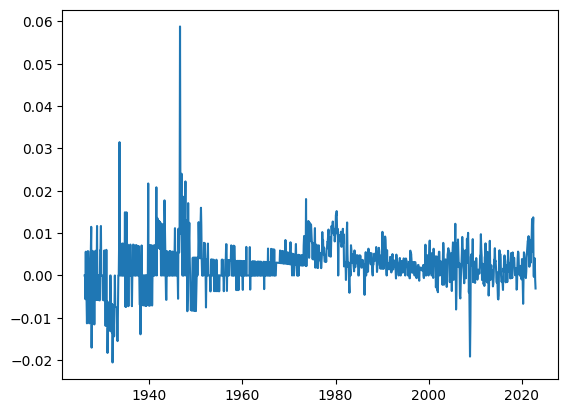

In [69]:
plt.plot(inflation['cpiret'])

In [70]:
def adfTest(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [71]:
adfTest(inflation['cpiret'])

Results of Dickey-Fuller Test:
Test Statistic                   -4.318631
p-value                           0.000412
#Lags Used                       23.000000
Number of Observations Used    1140.000000
Critical Value (1%)              -3.436099
Critical Value (5%)              -2.864079
Critical Value (10%)             -2.568122
dtype: float64


This show that inflation movements are stationary

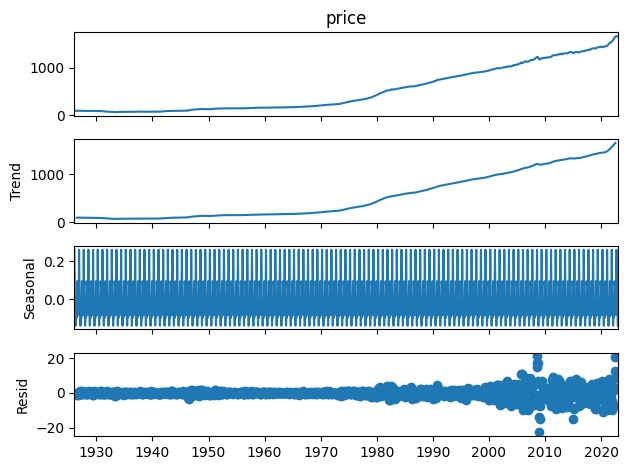

In [72]:
decompose_results = seasonal_decompose(inflation['price'], model='additive', period = 10)
decompose_results.plot()
plt.show()

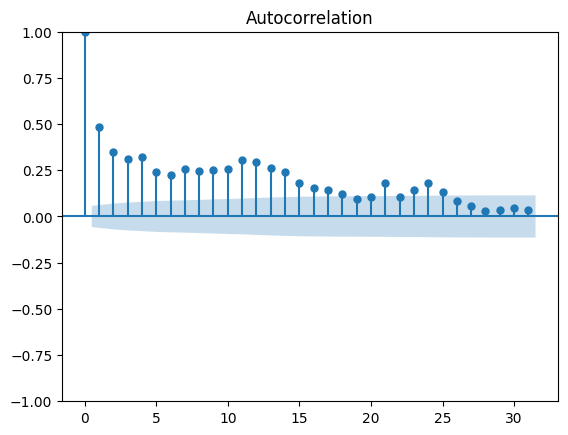

In [73]:
plot_acf(inflation['cpiret']);

In [74]:
full = pd.DataFrame(inflation[inflation.index>=earliest])
full = full.drop(columns={'price','y-over-y'})
full = full[full.index <= latest]
full.rename(columns={'cpiret':'inflation'},inplace=True)
qe = list(qe_qt['Total Balance Growth'])
full['qe'] = qe
full['prof'] = prof
full['unem'] = unem_g
full['gov'] = gov_g
full['wage'] = wag_g
full['fedr'] = fedr_g


,inflation,qe,prof,unem,gov,wage,fedr
date,,,,,,,
2003-01-31,0.004422,0.000000,0.000000,-0.033333,0.074099,0.000000,0.000000
2003-02-28,0.007705,-0.004681,-0.005860,0.017241,0.000000,0.008955,0.016129
2003-03-31,0.006008,0.003224,0.000000,0.000000,0.000000,0.000000,-0.007937
2003-04-30,-0.002172,0.018345,0.000000,0.016949,0.000000,0.000000,0.008000
2003-05-30,-0.001632,0.001943,-0.049880,0.016667,0.000000,-0.002959,0.000000
...,...,...,...,...,...,...,...
2022-02-28,0.009134,0.008731,0.162011,-0.050000,0.000000,-0.008287,0.000000
2022-03-31,0.013351,0.004072,0.000000,-0.052632,0.000000,0.000000,1.500000
2022-04-29,0.005583,0.001758,0.000000,0.000000,0.000000,0.000000,0.650000


In [75]:
full.corr()

,inflation,qe,prof,unem,gov,wage,fedr
inflation,1.000000,-0.346400,0.168534,-0.168024,0.050406,-0.063676,0.348121
qe,-0.346400,1.000000,-0.097971,0.426360,-0.054079,-0.002397,-0.365132
prof,0.168534,-0.097971,1.000000,-0.021697,-0.009811,-0.295850,0.128699
unem,-0.168024,0.426360,-0.021697,1.000000,-0.011680,0.020706,-0.336520
gov,0.050406,-0.054079,-0.009811,-0.011680,1.000000,-0.007510,-0.009940
wage,-0.063676,-0.002397,-0.295850,0.020706,-0.007510,1.000000,0.004903
fedr,0.348121,-0.365132,0.128699,-0.336520,-0.009940,0.004903,1.000000


In [76]:
together = pd.DataFrame(inflation[inflation.index>=earliest])
together = together.drop(columns={'cpiret','y-over-y'})
together = together[together.index < latest]
together.rename(columns={'price':'inflation'},inplace=True)
qe = list(qe_qt['Total Balance'])
together['qe'] = qe
together['prof'] = prof_t
together['unem'] = unem_t
together['gov'] = gov_t
together['wage'] = wag_t
together['fedr'] = fedr_t

,inflation,qe,prof,unem,gov,wage,fedr
date,,,,,,,
2003-01-31,1015.084319,0.724718,103917.0,5.8,179991.583333,335.0,1.24
2003-02-28,1022.905544,0.721326,103308.0,5.9,179991.583333,338.0,1.26
2003-03-31,1029.051161,0.723651,103308.0,5.9,179991.583333,338.0,1.25
2003-04-30,1026.816062,0.736926,103308.0,6.0,179991.583333,338.0,1.26
2003-05-30,1025.140298,0.738358,98155.0,6.1,179991.583333,337.0,1.26
...,...,...,...,...,...,...,...
2022-02-28,1585.009745,8.897595,537136.0,3.8,522777.000000,359.0,0.08
2022-03-31,1606.171210,8.933825,537136.0,3.6,522777.000000,359.0,0.20
2022-04-29,1615.138464,8.949532,537136.0,3.6,522777.000000,359.0,0.33


<Axes: >

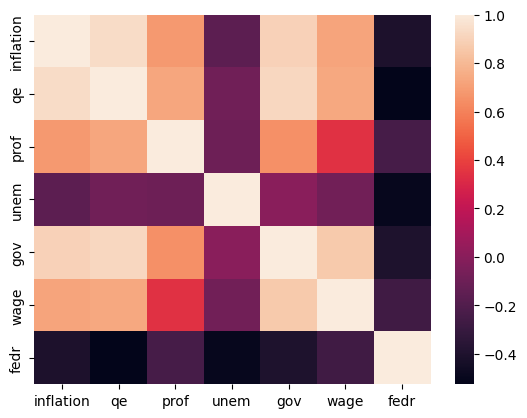

In [77]:
t_corr = together.corr()
sns.heatmap(t_corr)

In [78]:
t_corr

,inflation,qe,prof,unem,gov,wage,fedr
inflation,1.000000,0.934816,0.678189,-0.161799,0.892750,0.721790,-0.410354
qe,0.934816,1.000000,0.725918,-0.085225,0.918828,0.733301,-0.526169
prof,0.678189,0.725918,1.000000,-0.099963,0.652807,0.344135,-0.245082
unem,-0.161799,-0.085225,-0.099963,1.000000,-0.000138,-0.079500,-0.499880
gov,0.892750,0.918828,0.652807,-0.000138,1.000000,0.866286,-0.406766
wage,0.721790,0.733301,0.344135,-0.079500,0.866286,1.000000,-0.264020
fedr,-0.410354,-0.526169,-0.245082,-0.499880,-0.406766,-0.264020,1.000000


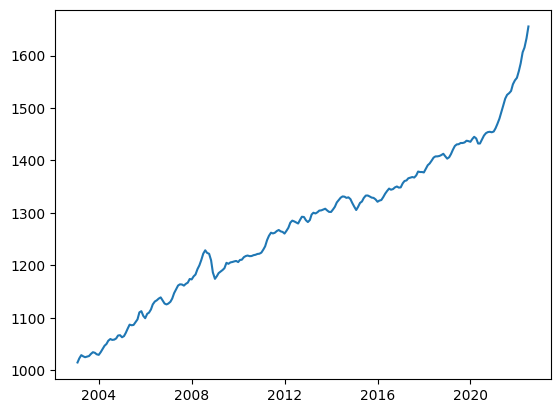

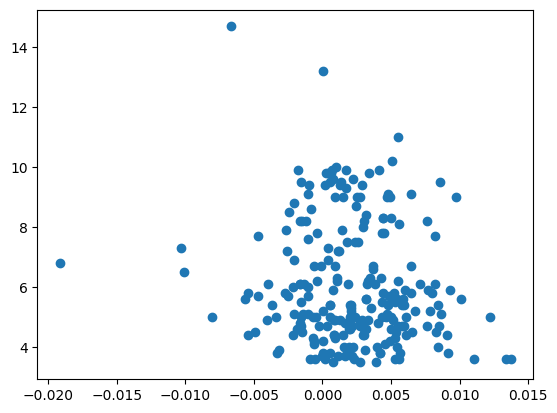

In [80]:
plt.scatter(full['inflation'],together['unem'])
plt.show()

In [81]:
full_train, full_test = temporal_train_test_split(full, test_size = 12)

(12, 7)

In [82]:
cols = list(full.columns)
cols

['inflation', 'qe', 'prof', 'unem', 'gov', 'wage', 'fedr']

In [83]:
varma_model = VARMAX(full_train[cols], order=(1, 0)).fit(disp=False)
varma_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Dep. Variable:,"['inflation', 'qe', 'prof', 'unem', 'gov', 'wage', 'fedr']",No. Observations:,222
Model:,VAR(1),Log Likelihood,2912.349
,+ intercept,AIC,-5656.698
Date:,"Wed, 29 Nov 2023",BIC,-5370.873
Time:,16:35:37,HQIC,-5541.299
Sample:,0,,
,- 222,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"3.26, 0.99, 0.28, 0.08, 0.21, 0.03, 0.01",Jarque-Bera (JB):,"1.48, 103244.03, 9859.99, 138901.13, 148787.43, 312.52, 1191.35"
Prob(Q):,"0.07, 0.32, 0.60, 0.78, 0.64, 0.85, 0.91",Prob(JB):,"0.48, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"0.43, 0.22, 0.48, 4.85, 5.11, 1.12, 3.89",Skew:,"-0.09, 9.06, 0.90, 8.59, 10.11, -0.37, 1.60"


In [84]:
yhat=varma_model.forecast(steps=len(full_test))
idx = full_test.index
fore = pd.DataFrame(yhat).set_index(idx)
fore.columns = [cols]
results = pd.concat([full_test,fore],axis=1)
results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,inflation,qe,prof,unem,gov,wage,fedr,"(inflation,)","(qe,)","(prof,)","(unem,)","(gov,)","(wage,)","(fedr,)"
date,,,,,,,,,,,,,,
2021-07-30,0.004811,0.020407,0.000000,-0.084746,0.000000,0.000000,0.250000,0.004390,0.007974,-0.072319,-0.094106,-0.010359,0.000332,0.066868
2021-08-31,0.002066,0.012397,0.098798,-0.037037,0.000000,-0.013624,-0.100000,0.002574,0.011281,-0.113821,-0.011983,0.000959,-0.000257,-0.004557
2021-09-30,0.002716,0.015282,0.000000,-0.076923,0.000000,0.000000,-0.111111,0.002142,0.010427,-0.005388,0.002472,0.004343,-0.000016,-0.007002
2021-10-29,0.008308,0.011630,0.000000,-0.062500,0.000000,0.000000,0.000000,0.002053,0.011376,0.016309,0.007580,0.005477,0.000203,0.004547
2021-11-30,0.004913,0.015518,-0.119004,-0.066667,0.000000,0.000000,0.000000,0.001982,0.011802,0.019433,0.005570,0.005589,0.000320,0.008613
2021-12-31,0.003073,0.008698,0.000000,-0.071429,0.000000,0.000000,0.000000,0.001920,0.012059,0.016393,0.005021,0.005696,0.000375,0.008865
2022-01-31,0.008415,0.011081,0.000000,0.025641,-0.080491,0.000000,0.000000,0.001880,0.012161,0.015707,0.005055,0.005792,0.000400,0.008303
2022-02-28,0.009134,0.008731,0.162011,-0.050000,0.000000,-0.008287,0.000000,0.001859,0.012216,0.015908,0.005280,0.005864,0.000412,0.008032
2022-03-31,0.013351,0.004072,0.000000,-0.052632,0.000000,0.000000,1.500000,0.001849,0.012248,0.016233,0.005400,0.005902,0.000418,0.007978


<Axes: xlabel='date'>

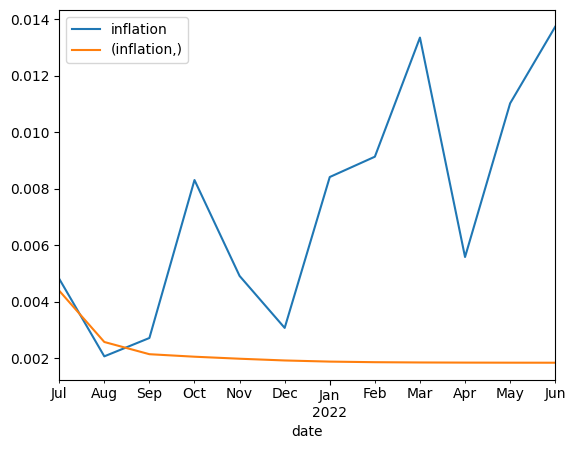

In [85]:
results.iloc[:,[0,7]].plot()
plt.show()

In [86]:
mae = mean_absolute_error(full_test['inflation'], fore['inflation'])
mse = mean_squared_error(full_test['inflation'], fore['inflation'])

print("mae = ", mae)
print("mse = ", mse)

mae =  0.005164247816446792
mse =  4.312732156573387e-05


In [87]:
cols2 = ['inflation', 'qe', 'prof', 'unem', 'gov', 'wage', 'fedr']

#### Granger Causation

In [88]:
p_values_table = pd.DataFrame(columns = full.columns[1:])


,qe,prof,unem,gov,wage,fedr


In [89]:
p_values = {}
for j in range(6):
    granger_results = grangercausalitytests(full.iloc[:,[0,1+j]], maxlag=12, verbose=True)
    p_values[full.columns[1+j]] = [granger_results[i+1][0]['ssr_ftest'][1] for i in range(12)]
    p_values_table[full.columns[1+j]] = p_values[full.columns[1+j]]
    print(full.columns[1+j])
    print(p_values)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.1658 , p=0.0006  , df_denom=230, df_num=1
ssr based chi2 test:   chi2=12.3244 , p=0.0004  , df=1
likelihood ratio test: chi2=12.0095 , p=0.0005  , df=1
parameter F test:         F=12.1658 , p=0.0006  , df_denom=230, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.0750  , p=0.0004  , df_denom=227, df_num=2
ssr based chi2 test:   chi2=16.5058 , p=0.0003  , df=2
likelihood ratio test: chi2=15.9451 , p=0.0003  , df=2
parameter F test:         F=8.0750  , p=0.0004  , df_denom=227, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.6065  , p=0.0010  , df_denom=224, df_num=3
ssr based chi2 test:   chi2=17.3450 , p=0.0006  , df=3
likelihood ratio test: chi2=16.7247 , p=0.0008  , df=3
parameter F test:         F=5.6065  , p=0.0010  , df_denom=224, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.7676  , p=0.0010  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



parameter F test:         F=3.8038  , p=0.0000  , df_denom=197, df_num=12
qe
{'qe': [0.000583065274639411, 0.0004094462678457844, 0.0010059123960829946, 0.0010427182516762937, 0.002594084570831756, 0.004648501667255668, 0.008754703455866729, 0.014042595496823431, 0.009538877573932817, 0.0002580507793347691, 0.0005156771660559165, 3.2390375609171885e-05]}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1979  , p=0.2749  , df_denom=230, df_num=1
ssr based chi2 test:   chi2=1.2135  , p=0.2706  , df=1
likelihood ratio test: chi2=1.2103  , p=0.2713  , df=1
parameter F test:         F=1.1979  , p=0.2749  , df_denom=230, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2972  , p=0.2753  , df_denom=227, df_num=2
ssr based chi2 test:   chi2=2.6516  , p=0.2656  , df=2
likelihood ratio test: chi2=2.6365  , p=0.2676  , df=2
parameter F test:         F=1.2972  , p=0.2753  , df_denom=227, df_num=2

Granger Causality
number of lags (no 

In [90]:
p_values_table

,qe,prof,unem,gov,wage,fedr
0,0.000583,0.274894,0.635443,0.681128,0.005311,0.498601
1,0.000409,0.275312,0.652486,0.756747,0.009058,0.607932
2,0.001006,0.031294,0.812915,0.609484,0.006170,0.632453
3,0.001043,0.008687,0.903307,0.763522,0.016518,0.807012
4,0.002594,0.008435,0.885373,0.667208,0.029997,0.870807
5,0.004649,0.019502,0.894184,0.698938,0.047284,0.932512
6,0.008755,0.028866,0.886960,0.806065,0.064571,0.941858
7,0.014043,0.054667,0.915868,0.842597,0.019754,0.955403
8,0.009539,0.080426,0.946743,0.697627,0.014946,0.970391
9,0.000258,0.069678,0.977746,0.452011,0.021035,0.901802


In [91]:
best_ps = p_values_table.loc[:,['qe','prof','wage']]
best_ps['aggregate'] = best_ps.sum(axis=1)


,qe,prof,wage,aggregate
0,0.000583,0.274894,0.005311,0.280788
1,0.000409,0.275312,0.009058,0.284779
2,0.001006,0.031294,0.006170,0.038470
3,0.001043,0.008687,0.016518,0.026247
4,0.002594,0.008435,0.029997,0.041026
5,0.004649,0.019502,0.047284,0.071434
6,0.008755,0.028866,0.064571,0.102191
7,0.014043,0.054667,0.019754,0.088463
8,0.009539,0.080426,0.014946,0.104911
9,0.000258,0.069678,0.021035,0.090971


In [92]:
reduced_full = full.loc[:,['inflation','qe','prof','wage']]
reduced_full.head(2)

,inflation,qe,prof,wage
date,,,,
2003-01-31,0.004422,0.000000,0.000000,0.000000
2003-02-28,0.007705,-0.004681,-0.005860,0.008955
2003-03-31,0.006008,0.003224,0.000000,0.000000
2003-04-30,-0.002172,0.018345,0.000000,0.000000
2003-05-30,-0.001632,0.001943,-0.049880,-0.002959
...,...,...,...,...
2022-02-28,0.009134,0.008731,0.162011,-0.008287
2022-03-31,0.013351,0.004072,0.000000,0.000000
2022-04-29,0.005583,0.001758,0.000000,0.000000


In [93]:
x_train, x_test = temporal_train_test_split(reduced_full, test_size = 50)


(50, 4)

In [94]:
varma_model2 = VARMAX(x_train, order=(3, 0)).fit(disp=False)
varma_model2.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Dep. Variable:,"['inflation', 'qe', 'prof', 'wage']",No. Observations:,184
Model:,VAR(3),Log Likelihood,1917.387
,+ intercept,AIC,-3710.775
Date:,"Wed, 29 Nov 2023",BIC,-3511.449
Time:,16:35:49,HQIC,-3629.985
Sample:,0,,
,- 184,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.07, 0.85, 0.03, 0.04",Jarque-Bera (JB):,"1.69, 22787.72, 3114.15, 190.62"
Prob(Q):,"0.79, 0.36, 0.87, 0.85",Prob(JB):,"0.43, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"0.45, 1.79, 1.93, 1.45",Skew:,"0.13, 5.86, 0.60, -0.03"


In [95]:
yhat=varma_model2.forecast(steps=len(x_test))
idx = x_test.index
fore2 = pd.DataFrame(yhat).set_index(idx)
fore2.columns = [reduced_full.columns]
results2 = pd.concat([x_test,fore2],axis=1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,inflation,qe,prof,wage,"(inflation,)","(qe,)","(prof,)","(wage,)"
date,,,,,,,,
2018-05-31,0.004159,-0.008852,-0.012690,0.008547,0.002767,0.016072,-0.003534,-0.000302
2018-06-29,0.001594,-0.006212,0.000000,0.000000,0.001581,0.018501,-0.025330,0.000736
2018-07-31,0.000067,-0.006674,0.000000,0.000000,0.000927,0.020284,-0.041106,0.000405
2018-08-31,0.000556,-0.011544,-0.147371,0.002825,0.001098,0.019109,-0.023258,0.000591
2018-09-28,0.001162,-0.007786,0.000000,0.000000,0.001247,0.017470,0.010804,0.000255
2018-10-31,0.001767,-0.008822,0.000000,0.000000,0.001457,0.014342,0.020088,0.000403
2018-11-30,-0.003349,-0.010838,-0.012734,0.000000,0.001680,0.009245,0.023658,0.000246
2018-12-31,-0.003194,-0.009516,0.000000,0.000000,0.001944,0.007083,0.026002,0.000188
2019-01-31,0.001907,-0.008136,0.000000,0.000000,0.002041,0.006916,0.024957,0.000110


,inflation,qe,prof,wage
date,,,,
2018-05-31,0.002767,0.016072,-0.003534,-0.000302
2018-06-29,0.001581,0.018501,-0.025330,0.000736
2018-07-31,0.000927,0.020284,-0.041106,0.000405
2018-08-31,0.001098,0.019109,-0.023258,0.000591
2018-09-28,0.001247,0.017470,0.010804,0.000255
2018-10-31,0.001457,0.014342,0.020088,0.000403
2018-11-30,0.001680,0.009245,0.023658,0.000246
2018-12-31,0.001944,0.007083,0.026002,0.000188
2019-01-31,0.002041,0.006916,0.024957,0.000110


<Axes: xlabel='date'>

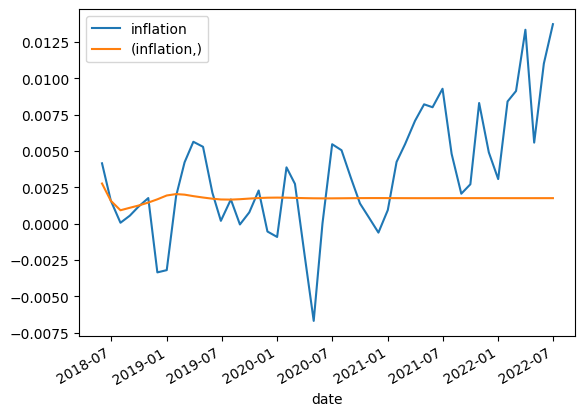

In [98]:
results2.iloc[:,[0,4]].plot()
plt.show()

#### Error Stats

In [99]:
mae = mean_absolute_error(x_test['inflation'], fore2['inflation'])
mse = mean_squared_error(x_test['inflation'], fore2['inflation'])

print("mae = ", mae)
print("mse = ", mse)

mae =  0.0032274779283093784
mse =  1.9257019427253943e-05


In [100]:
mae = mean_absolute_error(x_test['inflation'][:3], fore2['inflation'][:3])
mse = mean_squared_error(x_test['inflation'][:3], fore2['inflation'][:3])

print("mae = ", mae)
print("mse = ", mse)

mae =  0.0007548889084158487
mse =  8.922532209264998e-07


In [101]:
x_test['inflation'][:3]

date
2018-05-31    0.004159
2018-06-29    0.001594
2018-07-31    0.000067
Name: inflation, dtype: float64

### Regressions

In [102]:
import statsmodels.api as sm

In [103]:
lagged_full = reduced_full.copy()
lagged_full['inflation'] = lagged_full['inflation'].shift(3)
lagged_full.dropna(inplace=True)


,inflation,qe,prof,wage
date,,,,
2003-04-30,0.004422,0.018345,0.000000,0.000000
2003-05-30,0.007705,0.001943,-0.049880,-0.002959
2003-06-30,0.006008,0.000479,0.000000,0.000000
2003-07-31,-0.002172,0.003986,0.000000,0.000000
2003-08-29,-0.001632,-0.001941,0.188895,0.000000
...,...,...,...,...
2022-02-28,0.004913,0.008731,0.162011,-0.008287
2022-03-31,0.003073,0.004072,0.000000,0.000000
2022-04-29,0.008415,0.001758,0.000000,0.000000


In [104]:
together_t = together.iloc[:,[0,1,2,5]]
l_train, l_test = temporal_train_test_split(together_t, test_size = 12)

In [105]:
y = l_train['inflation']
x = sm.add_constant(l_train.iloc[:,1:])
reg = sm.OLS(y,x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inflation   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     395.3
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           7.42e-88
Time:                        16:35:51   Log-Likelihood:                -1184.8
No. Observations:                 222   AIC:                             2378.
Df Residuals:                     218   BIC:                             2391.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        748.4262    136.004      5.503      0.000     480.374    1016.478
qe            55.8798      3.449     16.202      0.000      49.082      62.677
prof        8.394e-05   5.23e-05      1.604      0.110   -1.92e-05       0.000
wage           0.9494      0.405      2.346      0.020       0.152       1.747
==============================================================================
Omnibus:                        0.285   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.435
Skew:                           0.009   Prob(JB):                        0.805
Kurtosis:                       2.784   Cond. No.                     9.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='date'>

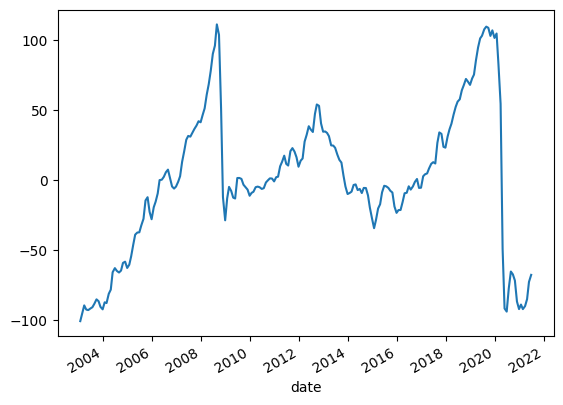

In [106]:
reg.resid.plot()
plt.title('Residuals')
plt.show()

In [107]:
ll_test = sm.add_constant(l_test.iloc[:, 1:])
yhat_l = reg.predict(ll_test)

date
2021-07-30    1594.601727
2021-08-31    1599.488734
2021-09-30    1606.569772
2021-10-29    1612.041078
2021-11-30    1614.184844
2021-12-31    1618.388520
2022-01-31    1623.790424
2022-02-28    1631.532099
2022-03-31    1633.556595
2022-04-29    1634.434313
2022-05-31    1629.095632
2022-06-30    1628.507651
dtype: float64

In [108]:
res = pd.concat([l_test,yhat_l],axis=1)
res.rename(columns={0:'pred'},inplace=True)

,inflation,qe,prof,wage,pred
date,,,,,
2021-07-30,1525.159665,8.190357,477510.0,367.0,1594.601727
2021-08-31,1528.310644,8.291893,524687.0,362.0,1599.488734
2021-09-30,1532.461536,8.418612,524687.0,362.0,1606.569772
2021-10-29,1545.193227,8.516524,524687.0,362.0,1612.041078
2021-11-30,1552.784761,8.648682,462247.0,362.0,1614.184844
2021-12-31,1557.556469,8.723909,462247.0,362.0,1618.388520
2022-01-31,1570.663306,8.820579,462247.0,362.0,1623.790424
2022-02-28,1585.009745,8.897595,537136.0,359.0,1631.532099
2022-03-31,1606.171210,8.933825,537136.0,359.0,1633.556595


<Axes: xlabel='date'>

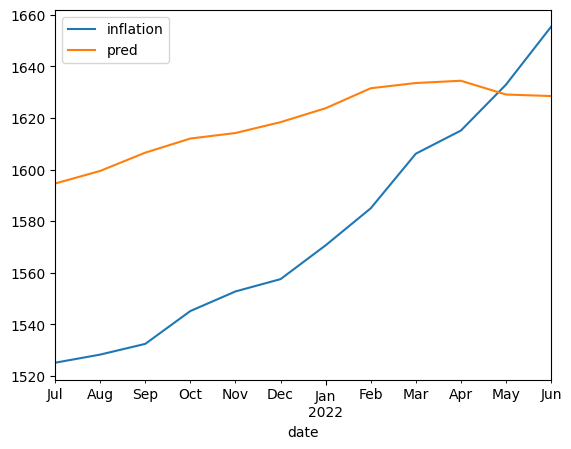

In [109]:
res.iloc[:,[0,4]].plot()
plt.title('inflation prediction')
plt.show()

### Official Forecast Based on Results

,inflation,qe,prof,wage
date,,,,
2003-01-31,0.004422,0.000000,0.000000,0.000000
2003-02-28,0.007705,-0.004681,-0.005860,0.008955
2003-03-31,0.006008,0.003224,0.000000,0.000000
2003-04-30,-0.002172,0.018345,0.000000,0.000000
2003-05-30,-0.001632,0.001943,-0.049880,-0.002959
...,...,...,...,...
2022-02-28,0.009134,0.008731,0.162011,-0.008287
2022-03-31,0.013351,0.004072,0.000000,0.000000
2022-04-29,0.005583,0.001758,0.000000,0.000000


In [111]:
forecast = []
num_periods = 59
i = num_periods
while(i > 3):
    s_train, s_test = temporal_train_test_split(reduced_full, test_size = i)
    varma_model3 = VARMAX(s_train, order=(3, 0)).fit(disp=False)
    yhat=varma_model3.forecast(steps=len(s_test))
    forecast.append(yhat.iloc[0,0])
    i -= 1
# idx = x_test.index
# fore2 = pd.DataFrame(yhat).set_index(idx)
# fore2.columns = [reduced_full.columns]
# results2 = pd.concat([x_test,fore2],axis=1)


59


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246]
58


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404]
57


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557]
56


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083]
55


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273]
54


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813]
53


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985]
52


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678]
51


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419]
50


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185]
49


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363]
48


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809]
47


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233]
46


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221]
45


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428]
44


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978]
43


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817]
42


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788]
41


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151]
40


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385]
39


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437]
38


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227]
37


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528]
36


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703]
35


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759]
34


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664]
33


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536]
32


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817]
31


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408]
30


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235]
29


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245]
28


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752]
27


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365]
26


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604]
25


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707]
24


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547]
23


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782]
22


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088]
21


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472]
20


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785]
19


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753]
18


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032]
17


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032, 0.004442047037863973]
16


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032, 0.004442047037863973, 0.003448448065383

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032, 0.004442047037863973, 0.003448448065383

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032, 0.004442047037863973, 0.003448448065383

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032, 0.004442047037863973, 0.003448448065383

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032, 0.004442047037863973, 0.003448448065383

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032, 0.004442047037863973, 0.003448448065383

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032, 0.004442047037863973, 0.003448448065383

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032, 0.004442047037863973, 0.003448448065383

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032, 0.004442047037863973, 0.003448448065383

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032, 0.004442047037863973, 0.003448448065383

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032, 0.004442047037863973, 0.003448448065383

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[0.001279071974843246, 0.005270338271332404, 0.004301332757178557, 0.0011814111755247083, -0.001034247566611273, 0.001233761020727813, 0.0032752058526963985, 0.002697168584701678, 0.0015707064066095419, 0.0027674583239797185, 0.0016739074680351363, 0.0009453205241144809, 0.0001507542513983233, 0.0014133586588136221, 0.0013493204824382428, 0.0014835002769074978, -0.0005994144760865817, 0.00022781738252917788, 0.003140177897656151, 0.0024141528565370385, 0.0035778668582634437, 0.002275026133049227, 0.0005278789317924528, 0.00028669334109269703, 0.001400049240142759, 0.0005374858139550664, 0.0009844038234169536, 0.001020815829041817, -0.0006409602222719408, -0.0013626704300195235, 0.0010437628672062245, -0.005162650186940752, -0.0018508999346930365, -0.012356624760736604, 0.004219444159471707, 0.014725226537398547, 0.008381784559279782, 0.003081614548170088, 0.0012895136462179472, 0.00047494708629348785, 0.0018202380392646753, 0.0031337202100701032, 0.004442047037863973, 0.003448448065383

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


56

In [164]:
s_train, s_test = temporal_train_test_split(reduced_full, test_size = 60)
forecasts = pd.DataFrame(index = s_test.index)
forecasts = pd.merge(forecasts,together["inflation"], on = 'date')
# uncomment the lines below the first time running this
# for i in range(60 - len(forecast)):
#     forecast.append(0)
forecasts['1-period forecast'] = forecasts
forecasts['1-period forecast'] = forecasts['1-period forecast'].shift(1)
forecasts.dropna(inplace=True)

In [165]:
forecasts['inflation forecast'] = (1+ forecasts['1-period forecast'])*forecasts['inflation']
forecasts['signal'] = np.where(forecasts['1-period forecast']>=0,1,0)


## Strategy Calculations

### Regressions

In [166]:
sec = pd.DataFrame(TIPs['Close'])
sec.rename(columns={'Close':'TIPs'},inplace=True)
sec['vnq'] = vnq['Close']
sec = sec[sec.index >= '2006-02-06']
sec = sec[sec.index < '2023-01-01']
sec['dbc'] = dbc['Close']
sec_m = sec.resample("M").last()


,TIPs,vnq,dbc
Date,,,
2006-02-28,102.849998,65.239998,23.290001
2006-03-31,100.650002,67.919998,23.940001
2006-04-30,99.900002,65.610001,25.620001
2006-05-31,99.699997,63.840000,25.520000
2006-06-30,99.570000,66.300003,25.299999
...,...,...,...
2022-08-31,113.910004,93.010002,25.719999
2022-09-30,104.900002,80.169998,23.910000
2022-10-31,106.389999,82.980003,25.120001


In [167]:
fed = fed_rate[fed_rate.index>='2006-02-01']
fed = fed[fed.index<'2023-01-01']
fed_ls = list(fed['fedfunds'])

In [168]:
securities = inflation[inflation.index >= '2006-02-01']
securities = securities.drop(columns=['y-over-y','cpiret'])
securities.rename(columns={'price':'inflation'},inplace = True)
securities['fed'] = fed_ls
securities['TIPs'] = list(sec_m['TIPs'])
securities['vnq'] = list(sec_m['vnq'] )
securities['dbc'] = list(sec_m['dbc'])


,inflation,fed,TIPs,vnq,dbc
date,,,,,
2006-02-28,1110.056173,4.49,102.849998,65.239998,23.290001
2006-03-31,1116.201444,4.59,100.650002,67.919998,23.940001
2006-04-28,1125.699202,4.79,99.900002,65.610001,25.620001
2006-05-31,1131.286047,4.94,99.699997,63.840000,25.520000
2006-06-30,1133.520337,4.99,99.570000,66.300003,25.299999
...,...,...,...,...,...
2022-08-31,1654.592598,2.33,113.910004,93.010002,25.719999
2022-09-30,1658.151627,2.56,104.900002,80.169998,23.910000
2022-10-31,1664.877090,3.08,106.389999,82.980003,25.120001


In [169]:
securities_ret = securities.pct_change().dropna()


,inflation,fed,TIPs,vnq,dbc
date,,,,,
2006-03-31,0.005536,0.022272,-0.021390,0.041079,0.027909
2006-04-28,0.008509,0.043573,-0.007452,-0.034011,0.070175
2006-05-31,0.004963,0.031315,-0.002002,-0.026978,-0.003903
2006-06-30,0.001975,0.010121,-0.001304,0.038534,-0.008621
2006-07-31,0.002957,0.050100,0.009441,0.038914,0.022134
...,...,...,...,...,...
2022-08-31,-0.000354,0.386905,-0.036539,-0.060125,-0.014937
2022-09-30,0.002151,0.098712,-0.079098,-0.138050,-0.070373
2022-10-31,0.004056,0.203125,0.014204,0.035051,0.050606


In [170]:
securities.corr()

,inflation,fed,TIPs,vnq,dbc
inflation,1.000000,-0.290020,0.682171,0.721421,-0.414574
fed,-0.290020,1.000000,-0.537565,0.097426,0.202591
TIPs,0.682171,-0.537565,1.000000,0.620521,-0.300103
vnq,0.721421,0.097426,0.620521,1.000000,-0.398058
dbc,-0.414574,0.202591,-0.300103,-0.398058,1.000000


In [171]:
securities_ret.corr()

,inflation,fed,TIPs,vnq,dbc
inflation,1.000000,0.366194,-0.032131,0.050041,0.388565
fed,0.366194,1.000000,-0.140468,0.018106,0.159421
TIPs,-0.032131,-0.140468,1.000000,0.389091,0.231318
vnq,0.050041,0.018106,0.389091,1.000000,0.340094
dbc,0.388565,0.159421,0.231318,0.340094,1.000000


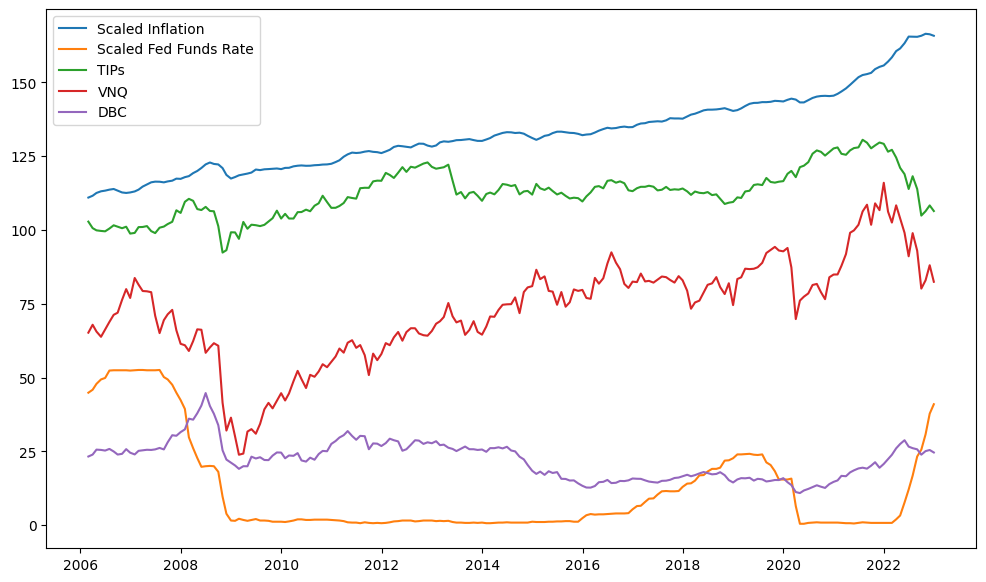

In [172]:
plt.figure(figsize=(12,7))
plt.plot(securities['inflation']/10, label ='Scaled Inflation')
plt.plot(securities['fed']*10, label ='Scaled Fed Funds Rate')
plt.plot(securities['TIPs'], label = "TIPs")
plt.plot(securities['vnq'],label ='VNQ')
plt.plot(securities['dbc'],label ='DBC')
plt.legend()
plt.show()

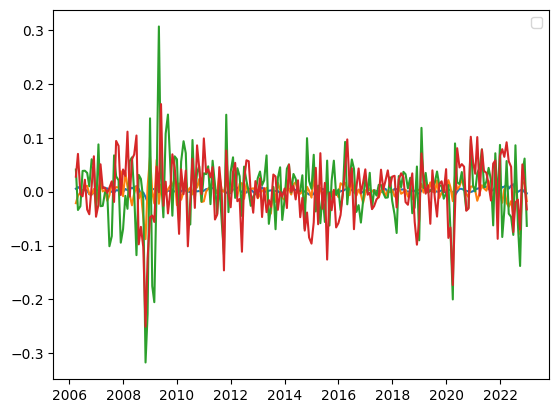

In [173]:
plt.plot(securities_ret['inflation'])
plt.plot(securities_ret['TIPs'])
plt.plot(securities_ret['vnq'])
plt.plot(securities_ret['dbc'])
plt.legend()
plt.show()

In [174]:
s_train, s_test = temporal_train_test_split(securities, test_size = 65)
x = sm.add_constant(s_train['inflation'])
x2 = sm.add_constant(s_train.loc[:,['inflation','fed']])
fores = sm.add_constant(forecasts['inflation forecast'])

In [175]:
time_inflation = s_test[s_test.index < "2022-07-01"]
plt.plot(time_inflation['inflation'], label='Actual Inflation')
plt.plot(fores['inflation forecast'],label='One-Month Inflation Forecast')
plt.title('One-Month Rolling Inflation Forecast')
plt.legend()
plt.show()

,const,inflation,fed
date,,,
2006-02-28,1.0,1110.056173,4.49
2006-03-31,1.0,1116.201444,4.59
2006-04-28,1.0,1125.699202,4.79
2006-05-31,1.0,1131.286047,4.94
2006-06-30,1.0,1133.520337,4.99
...,...,...,...
2017-03-31,1.0,1362.018527,0.79
2017-04-28,1.0,1366.058274,0.90
2017-05-31,1.0,1367.226253,0.91


In [ ]:
mae = mean_absolute_error(time_inflation['inflation'], fores['inflation forecast'])
mse = mean_squared_error(time_inflation['inflation'], fores['inflation forecast'])

print("mae = ", mae)
print("mse = ", mse)

In [176]:
fed2 = fed[fed.index<'2022-06-30']
fed2 = fed2[fed2.index>='2017-08-01']
fed2_ls = list(fed2['fedfunds'])
fores2 = fores.copy()
fores2['fed'] = fed2_ls

In [177]:
securities.head()

,inflation,fed,TIPs,vnq,dbc
date,,,,,
2006-02-28,1110.056173,4.49,102.849998,65.239998,23.290001
2006-03-31,1116.201444,4.59,100.650002,67.919998,23.940001
2006-04-28,1125.699202,4.79,99.900002,65.610001,25.620001
2006-05-31,1131.286047,4.94,99.699997,63.840000,25.520000
2006-06-30,1133.520337,4.99,99.570000,66.300003,25.299999


In [178]:
reduced_full.tail()

,inflation,qe,prof,wage
date,,,,
2022-02-28,0.009134,0.008731,0.162011,-0.008287
2022-03-31,0.013351,0.004072,0.000000,0.000000
2022-04-29,0.005583,0.001758,0.000000,0.000000
2022-05-31,0.011024,-0.001563,-0.164236,0.008357
2022-06-30,0.013736,-0.001178,0.000000,0.000000


In [179]:
y_tips = s_train['TIPs']
y_vnq = s_train['vnq']
y_dbc = s_train['dbc']
reg_tips = sm.OLS(y_tips,x).fit()
reg_vnq = sm.OLS(y_vnq,x).fit()
reg_dbc = sm.OLS(y_dbc,x).fit()

In [180]:
reg2_tips = sm.OLS(y_tips,x2).fit()
reg2_vnq = sm.OLS(y_vnq,x2).fit()
reg2_dbc = sm.OLS(y_dbc,x2).fit()

In [181]:
strat_tips = reg_tips.predict(fores)
strat_vnq = reg_vnq.predict(fores)
strat_dbc = reg_dbc.predict(fores)

In [182]:
strat_tips2 = reg2_tips.predict(fores2)
strat_vnq2 = reg2_vnq.predict(fores2)
strat_dbc2 = reg2_dbc.predict(fores2)

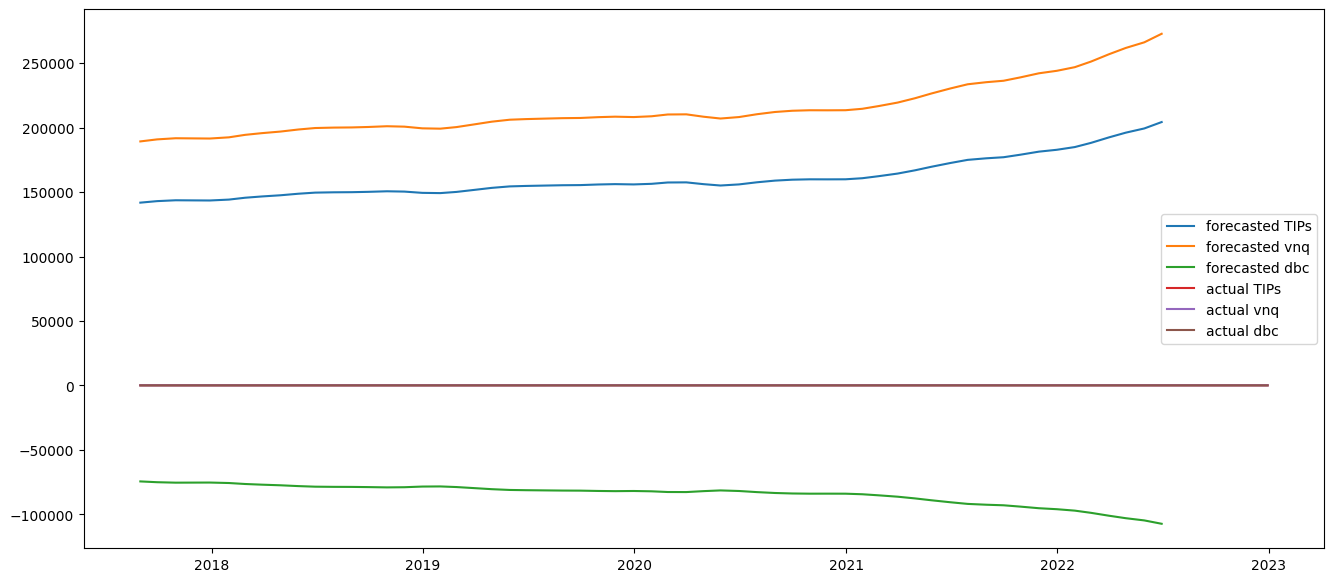

In [183]:
plt.figure(figsize=(16,7))
plt.plot(strat_tips,label='forecasted TIPs')
plt.plot(strat_vnq,label='forecasted vnq')
plt.plot(strat_dbc,label='forecasted dbc')
plt.plot(s_test['TIPs'],label='actual TIPs')
plt.plot(s_test['vnq'],label='actual vnq')
plt.plot(s_test['dbc'],label='actual dbc')
plt.legend()
plt.show()

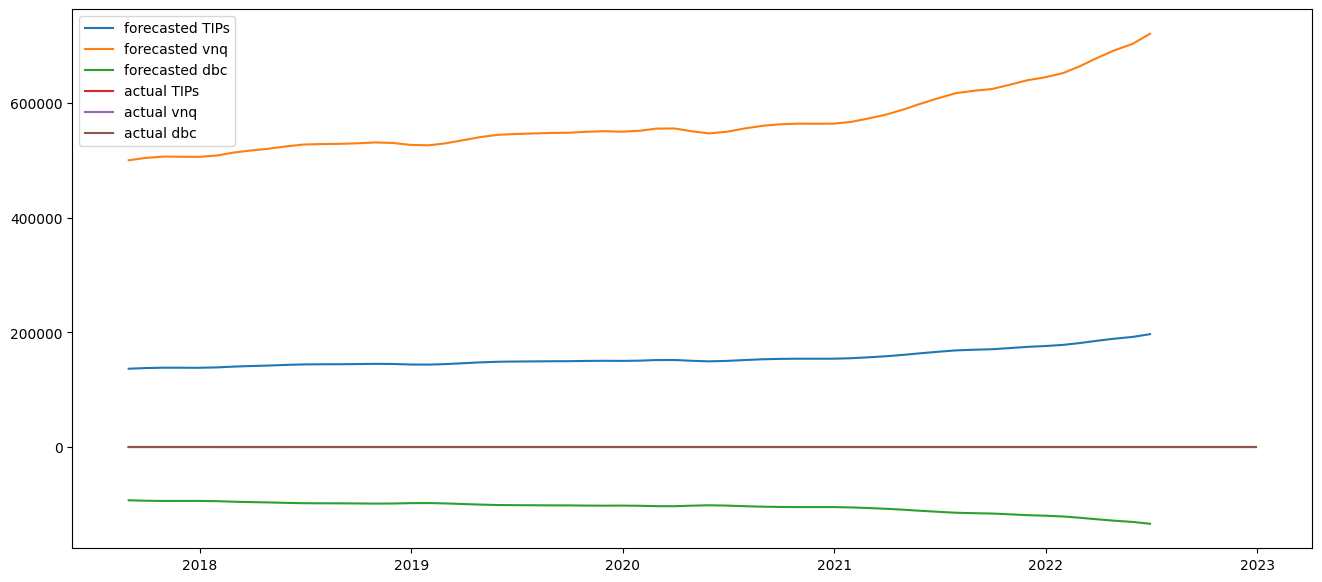

In [184]:
plt.figure(figsize=(16,7))
plt.plot(strat_tips2,label='forecasted TIPs')
plt.plot(strat_vnq2,label='forecasted vnq')
plt.plot(strat_dbc2,label='forecasted dbc')
plt.plot(s_test['TIPs'],label='actual TIPs')
plt.plot(s_test['vnq'],label='actual vnq')
plt.plot(s_test['dbc'],label='actual dbc')
plt.legend()
plt.show()

In [354]:
def strat_performance(strat,security,nlp_csv=None,nlp=False):
    performance = pd.DataFrame(strat_tips,columns=['forecast'])
    performance['growth'] = performance['forecast'].pct_change()
    if nlp:
      performance['signal'] = pd.read_csv(nlp_csv)[['signal']][1:].values

    else:
      performance['signal'] = np.where(performance['growth']>0,1,0)

    performance['signal'] = performance['signal'].shift(-1)
    performance = pd.merge(performance,security, on = 'date')
#     performance.dropna(inplace=True)
    ret = [0]
    change = 0
    for i in range(1,performance.shape[0]):
        if performance.iloc[i-1,2] == 1:
            change = (performance.iloc[i,3] - performance.iloc[i-1,3])/performance.iloc[i-1,3]
            ret.append(change)
        elif performance.iloc[i-1,2] == 0:
            change = (performance.iloc[i-1,3] - performance.iloc[i,3])/performance.iloc[i-1,3]
            ret.append(change)

    performance['signal return'] = ret
    performance['balance'] = 0
    balance = 0
    shares = 0
    bal = []
    shr = []
    for i in range(performance.shape[0]):
        if performance.iloc[i,2] == 1:
            if shares >= 0:
                shares += 100
                balance += 100*performance.iloc[i,3]
            elif shares < 0:
                balance += -shares*performance.iloc[i,3]
                shares = 0
        if performance.iloc[i,2] == 0:
            if shares <= 0:
#                 print(i, balance-100*performance.iloc[i,3])
                shares -= 100
                balance -= 100*performance.iloc[i,3]
            elif shares > 0:
                balance += -shares*performance.iloc[i,3]
                shares = 0
        bal.append(balance)
        shr.append(shares)
#     bal.append(0)
#     shr.append(0)
    performance['balance'] = bal
    performance['shares'] = shr
    performance['portfolio'] = performance['shares'] * performance.iloc[:,3]
    performance['moving profit'] = performance['portfolio'] -performance['balance']
#     performance['ret'] = performance['moving profit'].pct_change()

    profit = 0
    if shares > 0:
        profit = -(balance - shares*performance.iloc[i,3])
    if shares < 0:
        profit = -(balance + shares*performance.iloc[i,3])


    '''print("mean: ",performance['signal return'].mean())
    print("vol: ", performance['signal return'].std())
    print("Sharpe: ", (performance['signal return'].mean()/performance['signal return'].std())*np.sqrt(12))
    print("Strategy profit: ",profit)'''

    return performance,profit#, perf_metrics

### Performance analysis

In [398]:
tip_perf_nlp, tip_profit_nlp = strat_performance(strat_tips,securities["TIPs"],'update_nlp_sig_diff.csv',nlp=True)
dbc_perf_nlp, dbc_profit_nlp = strat_performance(strat_dbc,securities["dbc"],'update_nlp_sig_diff.csv',nlp=True)
vnq_perf_nlp, vnq_profit_nlp = strat_performance(strat_vnq,securities["vnq"],'update_nlp_sig_diff.csv',nlp=True)


In [399]:
tip_perf, tip_profit = strat_performance(strat_tips,securities["TIPs"])
dbc_perf, dbc_profit = strat_performance(strat_dbc,securities["dbc"])
vnq_perf, vnq_profit = strat_performance(strat_vnq,securities["vnq"])

In [448]:
pd.DataFrame([[tip_profit,dbc_profit,vnq_profit],[tip_profit_nlp,dbc_profit_nlp,vnq_profit_nlp]]
             ,index=['Forecast signal','NLP signal'],columns=['TIPs','DBC','VNQ']).style.format("${:.2f}").highlight_max(axis=1)

,TIPs,DBC,VNQ
Forecast signal,$-27061.00,$10569.00,$-23304.00
NLP signal,$26686.00,$4064.00,$28469.00


In [458]:
def perf_metrics(security_perfm, security):

  perf_metrics = pd.DataFrame()
  #prft = pd.DataFrame()
  ann = security_perfm.shape[0]
  perf_metrics.loc['Annualized return','security'] = security_perfm[['signal return']].add(1).prod().values[0] ** (12 / ann) - 1
  perf_metrics.loc['Annualized vol','security'] = security_perfm['signal return'].std() * np.sqrt(12)
  perf_metrics.loc['Sharpe ratio','security'] = perf_metrics.loc['Annualized return','security']/perf_metrics.loc['Annualized vol','security']
  #prft.loc['Profit','security'] = profit

  return perf_metrics.rename(columns={'security':security})

In [460]:
perf_metrics(dbc_perf, 'DBC').join(perf_metrics(vnq_perf_nlp, 'VNQ with nlp')).style.format("{:.2%}")

,DBC,VNQ with nlp
Annualized return,5.54%,1.97%
Annualized vol,19.23%,18.22%
Sharpe ratio,28.83%,10.82%


In [321]:
execution = pd.DataFrame()
execution.loc['TIPs','Forecast signal'] = tip_perf.signal.sum()
execution.loc['VNQ','Forecast signal'] = vnq_perf.signal.sum()
execution.loc['DBC','Forecast signal'] = dbc_perf.signal.sum()

execution.loc['TIPs','NLP signal'] = tip_perf_nlp.signal.sum()
execution.loc['VNQ','NLP signal'] = vnq_perf_nlp.signal.sum()
execution.loc['DBC','NLP signal'] = dbc_perf_nlp.signal.sum()

In [267]:
execution

,Forecast signal,NLP signal
TIPs,49.0,16.0
VNQ,49.0,16.0
DBC,49.0,16.0


In [230]:
fama = pd.read_csv('FF5.csv',skiprows=3)
fama = fama[:723].rename(columns={'Unnamed: 0':'date'})
fama.date = pd.to_datetime(fama.date,format='%Y%m')

In [231]:
fama_test = fama.set_index('date')['2017-08-01':'2022-06-30']
fama_test = fama_test.astype(float)

In [245]:
def calculate_alpha(y_coln, x_coln):

  #add constant to predictor variables
  x_coln = sm.add_constant(x_coln)
  y_coln = y_coln.iloc[:,0].values.reshape(-1,1)
  #fit linear regression model
  alpha_model = sm.OLS(y_coln, x_coln).fit()

  #view model summary
  return alpha_model.params[0]

In [451]:
y_f_sgn = dbc_perf_nlp[['signal return']]
y_n_sgn = vnq_perf_nlp[['signal return']]

In [452]:
alpha_table = pd.DataFrame()
CAPM = fama_test[['Mkt-RF']]
alpha_table.loc['CAPM', 'DBC'] = calculate_alpha(y_f_sgn, CAPM)
alpha_table.loc['CAPM', 'VNQ with nlp'] = calculate_alpha(y_n_sgn, CAPM)

In [453]:
fama3 = fama_test[['Mkt-RF', 'SMB', 'HML']]
alpha_table.loc['Fama 3', 'DBC'] = calculate_alpha(y_f_sgn, fama3)
alpha_table.loc['Fama 3', 'VNQ with nlp'] = calculate_alpha(y_n_sgn, fama3)

In [454]:
fama5 = fama_test[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
alpha_table.loc['Fama 5', 'DBC'] = calculate_alpha(y_f_sgn, fama5)
alpha_table.loc['Fama 5', 'VNQ with nlp'] = calculate_alpha(y_n_sgn, fama5)

In [455]:
alpha_table

,DBC,VNQ with nlp
CAPM,0.006324,0.006531
Fama 3,0.004889,0.005876
Fama 5,0.007439,0.007599
